In [ ]:
'''
Implementation of random noise in the form of bitfilp and phaseflip random errors 
followed by an error correction circuit that uses ancillary qubits i order
to give the error syndrome

The repetition code is implemented via GHZ states so |0> --> |000>, same for |1> and |0>+|1> --> |000>+|111>
'''

In [4]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.mitigation.measurement import *
import matplotlib.pyplot as plt

sim = Aer.get_backend('aer_simulator')

C:\Users\nico_\Anaconda3\lib\site-packages\qiskit\__init__.py:66: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of qiskit-terra 0.17.0. Support for running Qiskit with Python 3.6 will be removed in qiskit-terra 0.20.0.
  DeprecationWarning,


In [5]:
'''
This function implements random error in the circuit appending  the gate randomly
Its arguments are the number of qubits of the circuit (not circuit+ancillary qubits) 
and the type of error 'bit' (bitflip) or 'phase' (phaseflip)

This function ALWAYS applies an error
'''
def apply_err(n, err):
    
    qc = QuantumCircuit(int(n), name='Error')
    which_qubit = np.random.randint(n)
    
    if err=='bit':
        qc.x(which_qubit)
    elif err=='phase':
        qc.z(which_qubit)
    else:
        pass
    
    err = qc.to_gate()
    
    return err, which_qubit

#returning which_bit helps to check the error syndrome and if the error correction circuit works correctly

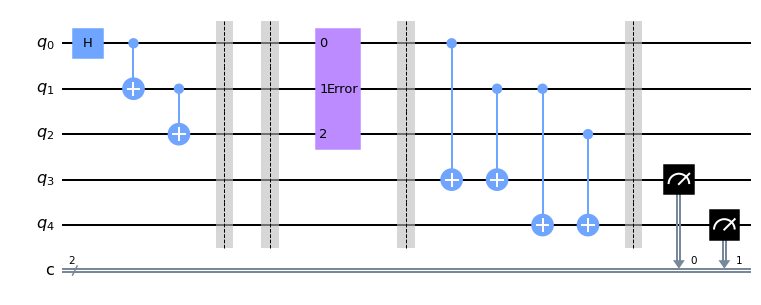

In [8]:
'''
Here a circuit with bitflip error is implemented
q are the qubits of the original circuit, a the number of ancillas required 
'''
q = 3
a = 2
qc_3qx = QuantumCircuit(q+a,a)


qc_3qx.h(0)

qc_3qx.cx(0,1)
qc_3qx.cx(1,2)
qc_3qx.barrier()

err, which_qubit = apply_err(3, 'phase')
qc_3qx.append(err, range(3))

qc_3qx.barrier()

qc_3qx.cx(0,3)
qc_3qx.cx(1,3)
qc_3qx.cx(1,4)
qc_3qx.cx(2,4)

qc_3qx.barrier()

qc_3qx.measure(3,0)
qc_3qx.measure(4,1)

qc_3qx.draw('mpl')


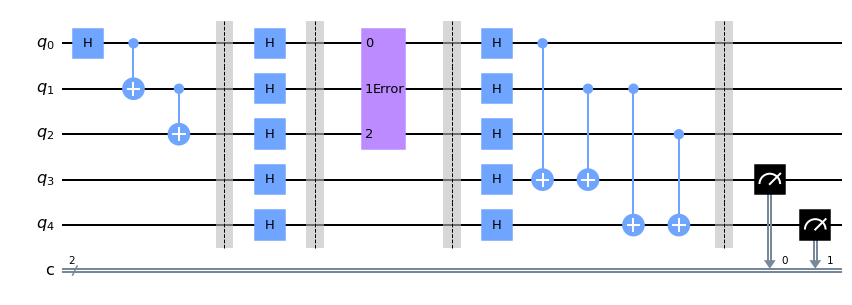

In [7]:
'''
Same thing as before  but with phaseflip
The only difference is in the change of basis before and after the error gate
Changing in hadamard base before the error |000>+|111> --> |+++>+|---> so a phaseflip
in comp. base is just a bitflip in hadamard base (e.g. if bit 0 change the phase
|000>+|(-1)11>) it means |-++>+|+--> in H base, so returnig in comp. base after the
error we get |100>+|011>, and this can be detected with cx ad before
'''

qc_3qz = QuantumCircuit(5,2)


qc_3qz.h(0)

qc_3qz.cx(0,1)
qc_3qz.cx(1,2)
qc_3qz.barrier()
qc_3qz.h(range(3))
qc_3qz.barrier()

err, which_qubit = apply_err(3, 'phase')
qc_3qz.append(err, range(3))

qc_3qz.barrier()
qc_3qz.h(range(3))

qc_3qz.cx(0,3)
qc_3qz.cx(1,3)
qc_3qz.cx(1,4)
qc_3qz.cx(2,4)

qc_3qz.barrier()

qc_3qz.measure(3,0)
qc_3qz.measure(4,1)

qc_3qz.draw('mpl')
